In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

1

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.49019 stdev: 0.09082
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.235
Mean genetic distance 2.851, standard deviation 0.470
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.427 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52547 stdev: 0.10000
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.259
Mean genetic distance 2.943, standard deviation 0.462
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 23.282 sec (23.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55422 stdev: 0.09753
Best fitness: 0.75943 - size: (2, 13) - species 20 - id 76
Average adjusted fitness: 0.248
Mean genetic distance 2.934, standard deviation 0.456
Population of 207 members in 28 species
Total extincti

Population's average fitness: 0.66140 stdev: 0.12286
Best fitness: 0.84601 - size: (8, 21) - species 22 - id 2404
Average adjusted fitness: 0.323
Mean genetic distance 3.297, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 46.784 sec (48.443 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65939 stdev: 0.12660
Best fitness: 0.84601 - size: (8, 21) - species 22 - id 2404
Average adjusted fitness: 0.306
Mean genetic distance 3.311, standard deviation 0.493
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 45.958 sec (48.123 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67113 stdev: 0.12062
Best fitness: 0.84601 - size: (8, 21) - species 22 - id 2404
Average adjusted fitness: 0.329
Mean genetic distance 3.315, standard deviation 0.495
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 58.015 sec (48.927 average)

 

Population's average fitness: 0.64698 stdev: 0.13319
Best fitness: 0.85343 - size: (9, 23) - species 22 - id 5410
Average adjusted fitness: 0.370
Mean genetic distance 3.218, standard deviation 0.559
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 37.293 sec (37.921 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64575 stdev: 0.12829
Best fitness: 0.85343 - size: (9, 23) - species 22 - id 5410
Average adjusted fitness: 0.289
Mean genetic distance 3.233, standard deviation 0.573
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 38.360 sec (38.102 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65182 stdev: 0.12368
Best fitness: 0.85343 - size: (9, 23) - species 22 - id 5410
Average adjusted fitness: 0.330
Mean genetic distance 3.223, standard deviation 0.583
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 37.529 sec (38.122 average)

 

Population's average fitness: 0.66214 stdev: 0.14824
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.262
Mean genetic distance 3.217, standard deviation 0.596
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 41.159 sec (41.580 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65474 stdev: 0.15072
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.422
Mean genetic distance 3.217, standard deviation 0.580
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 42.721 sec (41.885 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.65261 stdev: 0.15481
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.394
Mean genetic distance 3.208, standard deviation 0.585
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 40.570 sec (41.867 average)

Population's average fitness: 0.67670 stdev: 0.14727
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.416
Mean genetic distance 3.147, standard deviation 0.603
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 44.846 sec (42.903 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66083 stdev: 0.13370
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.263
Mean genetic distance 3.101, standard deviation 0.598
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 44.672 sec (43.295 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.66639 stdev: 0.14865
Best fitness: 0.85900 - size: (11, 25) - species 50 - id 9925
Average adjusted fitness: 0.348
Mean genetic distance 3.117, standard deviation 0.581
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 46.240 sec (43.596 average)

Population's average fitness: 0.67805 stdev: 0.15495
Best fitness: 0.85900 - size: (8, 20) - species 57 - id 16702
Average adjusted fitness: 0.341
Mean genetic distance 3.092, standard deviation 0.529
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 49.219 sec (48.874 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.68887 stdev: 0.15111
Best fitness: 0.85900 - size: (8, 20) - species 57 - id 16702
Average adjusted fitness: 0.457
Mean genetic distance 3.096, standard deviation 0.528
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 48.418 sec (48.855 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70288 stdev: 0.15467
Best fitness: 0.85900 - size: (8, 20) - species 57 - id 16702
Average adjusted fitness: 0.499
Mean genetic distance 3.077, standard deviation 0.534
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 46.660 sec (48.525 averag

Population's average fitness: 0.66203 stdev: 0.17436
Best fitness: 0.86271 - size: (17, 49) - species 66 - id 23466
Average adjusted fitness: 0.484
Mean genetic distance 3.100, standard deviation 0.487
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 53.587 sec (54.510 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.66704 stdev: 0.16650
Best fitness: 0.86271 - size: (17, 49) - species 89 - id 23466
Average adjusted fitness: 0.499
Mean genetic distance 3.097, standard deviation 0.497
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 54.264 sec (54.879 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.69592 stdev: 0.15400
Best fitness: 0.86518 - size: (18, 52) - species 89 - id 23809
Average adjusted fitness: 0.416
Mean genetic distance 3.089, standard deviation 0.539
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 53.715 sec (54.420 ave

Population's average fitness: 0.65682 stdev: 0.11816
Best fitness: 0.78726 - size: (6, 19) - species 1 - id 2501
Average adjusted fitness: 0.356
Mean genetic distance 3.157, standard deviation 0.494
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 31.762 sec (30.689 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67046 stdev: 0.10531
Best fitness: 0.78726 - size: (6, 19) - species 1 - id 2501
Average adjusted fitness: 0.370
Mean genetic distance 3.204, standard deviation 0.479
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 33.141 sec (30.928 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66166 stdev: 0.11985
Best fitness: 0.78726 - size: (6, 19) - species 1 - id 2501
Average adjusted fitness: 0.355
Mean genetic distance 3.212, standard deviation 0.482
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 33.334 sec (31.255 average)

 ***

Population's average fitness: 0.67488 stdev: 0.11362
Best fitness: 0.81880 - size: (6, 20) - species 18 - id 5382
Average adjusted fitness: 0.378
Mean genetic distance 3.247, standard deviation 0.535
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 36.989 sec (36.498 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65731 stdev: 0.12451
Best fitness: 0.81880 - size: (6, 20) - species 18 - id 5382
Average adjusted fitness: 0.355
Mean genetic distance 3.232, standard deviation 0.533
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 37.720 sec (36.677 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66000 stdev: 0.12906
Best fitness: 0.81880 - size: (6, 20) - species 18 - id 5382
Average adjusted fitness: 0.358
Mean genetic distance 3.158, standard deviation 0.555
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 37.992 sec (36.854 average)

 

Population's average fitness: 0.65174 stdev: 0.13814
Best fitness: 0.82622 - size: (6, 20) - species 42 - id 9707
Average adjusted fitness: 0.346
Mean genetic distance 3.207, standard deviation 0.577
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 37.470 sec (38.985 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65740 stdev: 0.13631
Best fitness: 0.82622 - size: (6, 20) - species 42 - id 9707
Average adjusted fitness: 0.391
Mean genetic distance 3.176, standard deviation 0.564
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 38.650 sec (38.859 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66768 stdev: 0.12711
Best fitness: 0.82622 - size: (6, 20) - species 42 - id 9707
Average adjusted fitness: 0.365
Mean genetic distance 3.190, standard deviation 0.560
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 39.264 sec (38.811 average)

 

Population's average fitness: 0.65841 stdev: 0.14413
Best fitness: 0.83179 - size: (10, 31) - species 18 - id 11173
Average adjusted fitness: 0.369
Mean genetic distance 3.286, standard deviation 0.581
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 44.593 sec (43.081 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.63663 stdev: 0.16355
Best fitness: 0.83179 - size: (10, 31) - species 18 - id 11173
Average adjusted fitness: 0.369
Mean genetic distance 3.233, standard deviation 0.600
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 40.528 sec (42.928 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65463 stdev: 0.14066
Best fitness: 0.83179 - size: (10, 31) - species 18 - id 11173
Average adjusted fitness: 0.379
Mean genetic distance 3.277, standard deviation 0.588
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 41.777 sec (42.622 avera

Population's average fitness: 0.64044 stdev: 0.15008
Best fitness: 0.83488 - size: (12, 34) - species 60 - id 15943
Average adjusted fitness: 0.325
Mean genetic distance 3.189, standard deviation 0.554
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 33.489 sec (33.320 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.62839 stdev: 0.16028
Best fitness: 0.83488 - size: (12, 34) - species 60 - id 15943
Average adjusted fitness: 0.299
Mean genetic distance 3.234, standard deviation 0.544
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 33.135 sec (33.190 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.63581 stdev: 0.15594
Best fitness: 0.83488 - size: (12, 34) - species 60 - id 15943
Average adjusted fitness: 0.346
Mean genetic distance 3.237, standard deviation 0.552
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 33.107 sec (32.985 ave

Population's average fitness: 0.65004 stdev: 0.14078
Best fitness: 0.83673 - size: (13, 38) - species 60 - id 21600
Average adjusted fitness: 0.357
Mean genetic distance 3.283, standard deviation 0.616
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 32.016 sec (31.391 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66555 stdev: 0.12630
Best fitness: 0.83673 - size: (13, 38) - species 60 - id 21600
Average adjusted fitness: 0.365
Mean genetic distance 3.258, standard deviation 0.625
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 31.722 sec (31.448 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.64869 stdev: 0.13975
Best fitness: 0.83673 - size: (13, 38) - species 60 - id 21600
Average adjusted fitness: 0.360
Mean genetic distance 3.287, standard deviation 0.623
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 31.548 sec (31.617 ave

Population's average fitness: 0.60496 stdev: 0.07717
Best fitness: 0.73840 - size: (6, 21) - species 36 - id 1285
Average adjusted fitness: 0.226
Mean genetic distance 3.070, standard deviation 0.458
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 22.887 sec (21.236 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60687 stdev: 0.08415
Best fitness: 0.73840 - size: (6, 21) - species 36 - id 1285
Average adjusted fitness: 0.236
Mean genetic distance 3.064, standard deviation 0.452
Population of 212 members in 47 species
Total extinctions: 0
Generation time: 21.905 sec (21.347 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59841 stdev: 0.09313
Best fitness: 0.73840 - size: (6, 21) - species 36 - id 1285
Average adjusted fitness: 0.282
Mean genetic distance 3.072, standard deviation 0.459
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 23.474 sec (21.671 average)

 

Population's average fitness: 0.61695 stdev: 0.08684
Best fitness: 0.75881 - size: (9, 24) - species 44 - id 3628
Average adjusted fitness: 0.239
Mean genetic distance 3.211, standard deviation 0.554
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 24.741 sec (24.814 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62005 stdev: 0.09175
Best fitness: 0.75881 - size: (9, 24) - species 44 - id 3628
Average adjusted fitness: 0.227
Mean genetic distance 3.217, standard deviation 0.552
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 25.419 sec (25.074 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62943 stdev: 0.08325
Best fitness: 0.75881 - size: (9, 24) - species 44 - id 3628
Average adjusted fitness: 0.256
Mean genetic distance 3.230, standard deviation 0.573
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 24.519 sec (25.137 average)

 

Population's average fitness: 0.62605 stdev: 0.09476
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.222
Mean genetic distance 3.247, standard deviation 0.564
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 29.389 sec (28.556 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62176 stdev: 0.09771
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.221
Mean genetic distance 3.222, standard deviation 0.568
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 27.985 sec (28.484 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62622 stdev: 0.10371
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.281
Mean genetic distance 3.203, standard deviation 0.572
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 28.211 sec (28.372 average)

 

Population's average fitness: 0.63148 stdev: 0.09847
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.237
Mean genetic distance 3.300, standard deviation 0.604
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 30.596 sec (31.012 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63292 stdev: 0.10108
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.233
Mean genetic distance 3.303, standard deviation 0.608
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 29.988 sec (30.956 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63118 stdev: 0.09325
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.222
Mean genetic distance 3.273, standard deviation 0.606
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 31.432 sec (31.021 average)

 

Population's average fitness: 0.62306 stdev: 0.09652
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.272
Mean genetic distance 3.254, standard deviation 0.612
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 34.089 sec (32.874 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.63656 stdev: 0.09246
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.230
Mean genetic distance 3.240, standard deviation 0.634
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 33.146 sec (33.027 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.63006 stdev: 0.09578
Best fitness: 0.79839 - size: (7, 23) - species 53 - id 5912
Average adjusted fitness: 0.252
Mean genetic distance 3.231, standard deviation 0.614
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 32.030 sec (33.053 average)


Population's average fitness: 0.61979 stdev: 0.11102
Best fitness: 0.81076 - size: (7, 24) - species 53 - id 17682
Average adjusted fitness: 0.280
Mean genetic distance 3.009, standard deviation 0.556
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 34.920 sec (35.557 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.62011 stdev: 0.10895
Best fitness: 0.81076 - size: (7, 24) - species 53 - id 17682
Average adjusted fitness: 0.289
Mean genetic distance 3.004, standard deviation 0.553
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 34.344 sec (35.558 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.61906 stdev: 0.11035
Best fitness: 0.81076 - size: (7, 24) - species 53 - id 17682
Average adjusted fitness: 0.223
Mean genetic distance 3.016, standard deviation 0.558
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 35.430 sec (35.633 averag

Population's average fitness: 0.56302 stdev: 0.05942
Best fitness: 0.67780 - size: (6, 19) - species 31 - id 1119
Average adjusted fitness: 0.147
Mean genetic distance 3.174, standard deviation 0.479
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 21.261 sec (19.446 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56540 stdev: 0.06032
Best fitness: 0.67780 - size: (6, 19) - species 11 - id 1119
Average adjusted fitness: 0.156
Mean genetic distance 3.211, standard deviation 0.471
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.408 sec (19.691 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56547 stdev: 0.05892
Best fitness: 0.67780 - size: (6, 19) - species 31 - id 1119
Average adjusted fitness: 0.144
Mean genetic distance 3.224, standard deviation 0.474
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.795 sec (19.925 average)

 **

Population's average fitness: 0.59429 stdev: 0.06969
Best fitness: 0.71676 - size: (4, 20) - species 44 - id 3241
Average adjusted fitness: 0.171
Mean genetic distance 3.298, standard deviation 0.483
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 25.388 sec (23.791 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60670 stdev: 0.06356
Best fitness: 0.71676 - size: (4, 20) - species 44 - id 3241
Average adjusted fitness: 0.163
Mean genetic distance 3.309, standard deviation 0.512
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 25.210 sec (23.979 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.59741 stdev: 0.06864
Best fitness: 0.71676 - size: (4, 20) - species 44 - id 3241
Average adjusted fitness: 0.176
Mean genetic distance 3.274, standard deviation 0.501
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.483 sec (24.120 average)

 

Population's average fitness: 0.60225 stdev: 0.06830
Best fitness: 0.75696 - size: (7, 29) - species 44 - id 7643
Average adjusted fitness: 0.196
Mean genetic distance 3.230, standard deviation 0.566
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 28.119 sec (26.492 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.59643 stdev: 0.07206
Best fitness: 0.75696 - size: (7, 29) - species 53 - id 7643
Average adjusted fitness: 0.127
Mean genetic distance 3.231, standard deviation 0.566
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 29.016 sec (26.830 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.60669 stdev: 0.07480
Best fitness: 0.75696 - size: (7, 29) - species 53 - id 7643
Average adjusted fitness: 0.163
Mean genetic distance 3.213, standard deviation 0.588
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 28.495 sec (27.043 average)

 

Population's average fitness: 0.61055 stdev: 0.07694
Best fitness: 0.77365 - size: (8, 31) - species 44 - id 11069
Average adjusted fitness: 0.178
Mean genetic distance 3.182, standard deviation 0.558
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 31.477 sec (29.993 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.60276 stdev: 0.07942
Best fitness: 0.77365 - size: (8, 31) - species 44 - id 11069
Average adjusted fitness: 0.219
Mean genetic distance 3.205, standard deviation 0.548
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 29.855 sec (30.006 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.60300 stdev: 0.07454
Best fitness: 0.77365 - size: (8, 31) - species 53 - id 11069
Average adjusted fitness: 0.167
Mean genetic distance 3.227, standard deviation 0.532
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 30.541 sec (30.031 average)

Population's average fitness: 0.59615 stdev: 0.07415
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.200
Mean genetic distance 2.975, standard deviation 0.584
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 35.104 sec (33.657 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.59053 stdev: 0.07131
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.168
Mean genetic distance 2.954, standard deviation 0.553
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 34.066 sec (33.845 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.58894 stdev: 0.07128
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.153
Mean genetic distance 2.944, standard deviation 0.549
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.508 sec (34.082 averag

Population's average fitness: 0.60413 stdev: 0.07581
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.161
Mean genetic distance 2.841, standard deviation 0.474
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.252 sec (42.181 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.60592 stdev: 0.07335
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.158
Mean genetic distance 2.813, standard deviation 0.497
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 43.625 sec (42.375 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.60672 stdev: 0.07772
Best fitness: 0.77365 - size: (8, 31) - species 65 - id 11069
Average adjusted fitness: 0.166
Mean genetic distance 2.773, standard deviation 0.529
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 42.277 sec (42.410 average


 ****** Running generation 0 ****** 

Population's average fitness: 0.48947 stdev: 0.07822
Best fitness: 0.70934 - size: (2, 13) - species 3 - id 146
Average adjusted fitness: 0.262
Mean genetic distance 2.969, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.118 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53882 stdev: 0.09488
Best fitness: 0.85281 - size: (3, 14) - species 1 - id 231
Average adjusted fitness: 0.283
Mean genetic distance 3.072, standard deviation 0.471
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 18.059 sec (17.589 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56723 stdev: 0.09906
Best fitness: 0.85281 - size: (3, 14) - species 1 - id 231
Average adjusted fitness: 0.273
Mean genetic distance 3.115, standard deviation 0.470
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.076 sec (18.0

Population's average fitness: 0.68481 stdev: 0.11679
Best fitness: 0.86518 - size: (6, 24) - species 16 - id 2381
Average adjusted fitness: 0.333
Mean genetic distance 3.332, standard deviation 0.489
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.266 sec (22.160 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67045 stdev: 0.12183
Best fitness: 0.86518 - size: (6, 24) - species 16 - id 2381
Average adjusted fitness: 0.299
Mean genetic distance 3.330, standard deviation 0.498
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 23.045 sec (22.314 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66729 stdev: 0.12519
Best fitness: 0.86518 - size: (6, 24) - species 16 - id 2381
Average adjusted fitness: 0.332
Mean genetic distance 3.331, standard deviation 0.493
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.905 sec (22.320 average)

 

Population's average fitness: 0.67218 stdev: 0.11686
Best fitness: 0.87817 - size: (9, 25) - species 4 - id 6381
Average adjusted fitness: 0.225
Mean genetic distance 3.424, standard deviation 0.575
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.473 sec (25.457 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66669 stdev: 0.11886
Best fitness: 0.88374 - size: (10, 28) - species 4 - id 7006
Average adjusted fitness: 0.214
Mean genetic distance 3.415, standard deviation 0.586
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 26.793 sec (25.693 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66928 stdev: 0.12651
Best fitness: 0.88806 - size: (10, 27) - species 4 - id 7179
Average adjusted fitness: 0.296
Mean genetic distance 3.415, standard deviation 0.575
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 26.135 sec (25.850 average)

 *

Population's average fitness: 0.68294 stdev: 0.13424
Best fitness: 0.89239 - size: (12, 32) - species 4 - id 9298
Average adjusted fitness: 0.340
Mean genetic distance 3.261, standard deviation 0.566
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 29.161 sec (28.454 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.68987 stdev: 0.13767
Best fitness: 0.89239 - size: (12, 32) - species 4 - id 9298
Average adjusted fitness: 0.412
Mean genetic distance 3.242, standard deviation 0.554
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 29.831 sec (28.683 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69141 stdev: 0.13208
Best fitness: 0.89239 - size: (12, 32) - species 4 - id 9298
Average adjusted fitness: 0.427
Mean genetic distance 3.217, standard deviation 0.553
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 29.648 sec (28.851 average)

 

Population's average fitness: 0.68857 stdev: 0.13455
Best fitness: 0.89487 - size: (12, 42) - species 16 - id 14178
Average adjusted fitness: 0.336
Mean genetic distance 3.305, standard deviation 0.607
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 31.729 sec (30.896 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.69713 stdev: 0.13048
Best fitness: 0.89487 - size: (12, 42) - species 16 - id 14178
Average adjusted fitness: 0.411
Mean genetic distance 3.285, standard deviation 0.621
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 30.567 sec (30.980 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68515 stdev: 0.13191
Best fitness: 0.89487 - size: (12, 42) - species 16 - id 14178
Average adjusted fitness: 0.380
Mean genetic distance 3.281, standard deviation 0.612
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 33.056 sec (31.250 avera

Population's average fitness: 0.72245 stdev: 0.12959
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.392
Mean genetic distance 3.332, standard deviation 0.633
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 34.005 sec (34.631 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.72040 stdev: 0.13591
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.349
Mean genetic distance 3.318, standard deviation 0.617
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 34.246 sec (34.706 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.72229 stdev: 0.13234
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.318
Mean genetic distance 3.306, standard deviation 0.612
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 33.567 sec (34.653 ave

Population's average fitness: 0.75263 stdev: 0.13210
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.386
Mean genetic distance 3.169, standard deviation 0.629
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 37.507 sec (36.655 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.75367 stdev: 0.13692
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.573
Mean genetic distance 3.164, standard deviation 0.631
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 36.977 sec (36.631 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.75476 stdev: 0.13288
Best fitness: 0.89981 - size: (12, 39) - species 16 - id 18012
Average adjusted fitness: 0.482
Mean genetic distance 3.144, standard deviation 0.654
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 36.307 sec (36.541 ave

Population's average fitness: 0.60972 stdev: 0.08525
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1497
Average adjusted fitness: 0.223
Mean genetic distance 3.269, standard deviation 0.481
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 22.518 sec (22.340 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61689 stdev: 0.07779
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1497
Average adjusted fitness: 0.298
Mean genetic distance 3.280, standard deviation 0.479
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.940 sec (22.453 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61807 stdev: 0.07844
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1497
Average adjusted fitness: 0.262
Mean genetic distance 3.268, standard deviation 0.497
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 23.934 sec (22.718 average)

 ***

Population's average fitness: 0.63112 stdev: 0.08522
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.242
Mean genetic distance 3.308, standard deviation 0.537
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 26.869 sec (26.406 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63678 stdev: 0.07960
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.236
Mean genetic distance 3.310, standard deviation 0.533
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 26.747 sec (26.578 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64560 stdev: 0.07377
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.220
Mean genetic distance 3.323, standard deviation 0.532
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 26.754 sec (26.649 average)

 ***

Population's average fitness: 0.62480 stdev: 0.08923
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.230
Mean genetic distance 3.174, standard deviation 0.584
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 29.816 sec (29.247 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61811 stdev: 0.09490
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.250
Mean genetic distance 3.194, standard deviation 0.575
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 30.243 sec (29.458 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62393 stdev: 0.08631
Best fitness: 0.76623 - size: (5, 18) - species 1 - id 4823
Average adjusted fitness: 0.267
Mean genetic distance 3.171, standard deviation 0.594
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 30.121 sec (29.718 average)

 ***

Population's average fitness: 0.62809 stdev: 0.10374
Best fitness: 0.76747 - size: (6, 19) - species 11 - id 13564
Average adjusted fitness: 0.251
Mean genetic distance 3.200, standard deviation 0.618
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 34.083 sec (32.791 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.63290 stdev: 0.10122
Best fitness: 0.76747 - size: (6, 19) - species 11 - id 13564
Average adjusted fitness: 0.234
Mean genetic distance 3.169, standard deviation 0.618
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 33.054 sec (32.782 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63049 stdev: 0.09932
Best fitness: 0.76747 - size: (6, 19) - species 11 - id 13564
Average adjusted fitness: 0.285
Mean genetic distance 3.129, standard deviation 0.607
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 32.937 sec (32.957 average)

Population's average fitness: 0.62399 stdev: 0.09774
Best fitness: 0.78850 - size: (16, 43) - species 57 - id 18043
Average adjusted fitness: 0.220
Mean genetic distance 3.107, standard deviation 0.641
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 34.684 sec (33.308 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.61351 stdev: 0.10105
Best fitness: 0.78850 - size: (16, 43) - species 57 - id 18043
Average adjusted fitness: 0.294
Mean genetic distance 3.095, standard deviation 0.662
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 36.203 sec (33.578 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.62955 stdev: 0.09121
Best fitness: 0.78973 - size: (17, 45) - species 57 - id 18414
Average adjusted fitness: 0.226
Mean genetic distance 3.074, standard deviation 0.651
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 37.173 sec (34.024 ave

Population's average fitness: 0.62047 stdev: 0.10073
Best fitness: 0.78973 - size: (17, 45) - species 57 - id 18414
Average adjusted fitness: 0.305
Mean genetic distance 3.054, standard deviation 0.546
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 34.102 sec (35.245 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.62750 stdev: 0.10360
Best fitness: 0.78973 - size: (17, 45) - species 57 - id 18414
Average adjusted fitness: 0.259
Mean genetic distance 3.049, standard deviation 0.539
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 33.659 sec (35.103 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.62152 stdev: 0.10458
Best fitness: 0.78973 - size: (17, 45) - species 57 - id 18414
Average adjusted fitness: 0.242
Mean genetic distance 3.051, standard deviation 0.520
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 34.200 sec (34.942 ave

Population's average fitness: 0.63623 stdev: 0.08654
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.285
Mean genetic distance 3.127, standard deviation 0.472
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 22.069 sec (20.806 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63325 stdev: 0.09504
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.265
Mean genetic distance 3.108, standard deviation 0.477
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.839 sec (21.062 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64054 stdev: 0.09019
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.265
Mean genetic distance 3.121, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.627 sec (21.351 average)

 ***

Population's average fitness: 0.63753 stdev: 0.10103
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.358
Mean genetic distance 3.209, standard deviation 0.572
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.002 sec (24.078 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63675 stdev: 0.10317
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.302
Mean genetic distance 3.196, standard deviation 0.569
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 24.376 sec (24.123 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63147 stdev: 0.10236
Best fitness: 0.80643 - size: (2, 13) - species 28 - id 642
Average adjusted fitness: 0.250
Mean genetic distance 3.165, standard deviation 0.579
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 24.381 sec (24.192 average)

 ***

Population's average fitness: 0.66623 stdev: 0.11083
Best fitness: 0.83426 - size: (8, 26) - species 41 - id 7703
Average adjusted fitness: 0.261
Mean genetic distance 3.255, standard deviation 0.623
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 32.206 sec (30.774 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.67107 stdev: 0.09283
Best fitness: 0.83426 - size: (8, 26) - species 41 - id 7703
Average adjusted fitness: 0.269
Mean genetic distance 3.258, standard deviation 0.621
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 32.041 sec (30.928 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66694 stdev: 0.10186
Best fitness: 0.83426 - size: (8, 26) - species 41 - id 7703
Average adjusted fitness: 0.268
Mean genetic distance 3.237, standard deviation 0.630
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 34.044 sec (31.295 average)

 

Population's average fitness: 0.68486 stdev: 0.10843
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.432
Mean genetic distance 3.051, standard deviation 0.589
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 36.132 sec (39.261 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.69794 stdev: 0.10324
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.303
Mean genetic distance 3.016, standard deviation 0.612
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 39.346 sec (37.972 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.68672 stdev: 0.11299
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.349
Mean genetic distance 3.008, standard deviation 0.613
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 41.415 sec (38.039 average)

Population's average fitness: 0.69059 stdev: 0.11111
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.287
Mean genetic distance 3.133, standard deviation 0.655
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 35.188 sec (38.802 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.69345 stdev: 0.10391
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.290
Mean genetic distance 3.156, standard deviation 0.639
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 34.922 sec (39.010 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.69466 stdev: 0.10923
Best fitness: 0.84106 - size: (9, 28) - species 41 - id 12292
Average adjusted fitness: 0.362
Mean genetic distance 3.150, standard deviation 0.640
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 43.495 sec (40.153 averag

Population's average fitness: 0.67231 stdev: 0.12046
Best fitness: 0.85776 - size: (12, 35) - species 67 - id 21333
Average adjusted fitness: 0.323
Mean genetic distance 3.171, standard deviation 0.626
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 43.609 sec (34.539 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.67950 stdev: 0.10052
Best fitness: 0.85776 - size: (12, 35) - species 67 - id 21333
Average adjusted fitness: 0.284
Mean genetic distance 3.194, standard deviation 0.621
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.544 sec (34.410 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.67799 stdev: 0.11614
Best fitness: 0.85776 - size: (12, 35) - species 67 - id 21333
Average adjusted fitness: 0.334
Mean genetic distance 3.198, standard deviation 0.629
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 40.096 sec (34.985 ave

Population's average fitness: 0.57290 stdev: 0.07792
Best fitness: 0.74892 - size: (2, 15) - species 5 - id 1092
Average adjusted fitness: 0.215
Mean genetic distance 3.164, standard deviation 0.514
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 18.665 sec (20.971 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57474 stdev: 0.07887
Best fitness: 0.74892 - size: (2, 15) - species 5 - id 1092
Average adjusted fitness: 0.198
Mean genetic distance 3.141, standard deviation 0.514
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 18.895 sec (20.711 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58643 stdev: 0.07395
Best fitness: 0.74892 - size: (2, 15) - species 5 - id 1092
Average adjusted fitness: 0.195
Mean genetic distance 3.172, standard deviation 0.511
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 20.664 sec (20.706 average)

 *****

Population's average fitness: 0.61050 stdev: 0.08436
Best fitness: 0.78108 - size: (3, 17) - species 5 - id 4027
Average adjusted fitness: 0.193
Mean genetic distance 3.294, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.533 sec (18.276 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61578 stdev: 0.08316
Best fitness: 0.78108 - size: (3, 17) - species 5 - id 4027
Average adjusted fitness: 0.163
Mean genetic distance 3.283, standard deviation 0.499
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 19.782 sec (18.552 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61648 stdev: 0.08513
Best fitness: 0.78108 - size: (3, 17) - species 5 - id 4027
Average adjusted fitness: 0.235
Mean genetic distance 3.258, standard deviation 0.497
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 20.032 sec (18.914 average)

 ***

Population's average fitness: 0.63526 stdev: 0.08879
Best fitness: 0.79839 - size: (8, 24) - species 29 - id 4692
Average adjusted fitness: 0.172
Mean genetic distance 3.154, standard deviation 0.560
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 19.004 sec (19.489 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63077 stdev: 0.09410
Best fitness: 0.79839 - size: (8, 24) - species 29 - id 4692
Average adjusted fitness: 0.197
Mean genetic distance 3.135, standard deviation 0.549
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 22.468 sec (19.891 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63693 stdev: 0.09299
Best fitness: 0.79839 - size: (8, 24) - species 29 - id 4692
Average adjusted fitness: 0.268
Mean genetic distance 3.153, standard deviation 0.541
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 21.071 sec (20.001 average)

 

Population's average fitness: 0.64357 stdev: 0.09518
Best fitness: 0.81200 - size: (9, 25) - species 69 - id 11301
Average adjusted fitness: 0.313
Mean genetic distance 3.150, standard deviation 0.496
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 18.279 sec (19.069 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.65360 stdev: 0.08910
Best fitness: 0.81200 - size: (9, 25) - species 69 - id 11301
Average adjusted fitness: 0.201
Mean genetic distance 3.117, standard deviation 0.520
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 18.400 sec (18.925 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65195 stdev: 0.09503
Best fitness: 0.81200 - size: (9, 25) - species 69 - id 11301
Average adjusted fitness: 0.334
Mean genetic distance 3.125, standard deviation 0.527
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.656 sec (18.614 average)

Population's average fitness: 0.64892 stdev: 0.09741
Best fitness: 0.82993 - size: (12, 32) - species 82 - id 15139
Average adjusted fitness: 0.281
Mean genetic distance 3.136, standard deviation 0.547
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 19.979 sec (20.356 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64024 stdev: 0.10402
Best fitness: 0.83735 - size: (13, 33) - species 82 - id 15812
Average adjusted fitness: 0.241
Mean genetic distance 3.117, standard deviation 0.552
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 18.281 sec (19.953 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.65673 stdev: 0.09164
Best fitness: 0.83735 - size: (13, 33) - species 82 - id 15812
Average adjusted fitness: 0.185
Mean genetic distance 3.128, standard deviation 0.527
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 16.606 sec (19.531 ave

Population's average fitness: 0.62904 stdev: 0.10801
Best fitness: 0.83735 - size: (13, 33) - species 82 - id 15812
Average adjusted fitness: 0.287
Mean genetic distance 3.151, standard deviation 0.563
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 18.610 sec (18.021 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.64544 stdev: 0.10177
Best fitness: 0.83735 - size: (13, 33) - species 82 - id 15812
Average adjusted fitness: 0.193
Mean genetic distance 3.122, standard deviation 0.586
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 18.859 sec (18.087 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.65346 stdev: 0.10071
Best fitness: 0.83735 - size: (13, 33) - species 82 - id 15812
Average adjusted fitness: 0.298
Mean genetic distance 3.131, standard deviation 0.599
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 18.425 sec (18.098 ave

Population's average fitness: 0.45895 stdev: 0.14414
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.222
Mean genetic distance 2.876, standard deviation 0.444
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.415 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54790 stdev: 0.13914
Best fitness: 0.75510 - size: (3, 15) - species 17 - id 337
Average adjusted fitness: 0.279
Mean genetic distance 2.950, standard deviation 0.448
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 10.920 sec (10.668 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59082 stdev: 0.14360
Best fitness: 0.77798 - size: (3, 15) - species 9 - id 439
Average adjusted fitness: 0.325
Mean genetic distance 2.990, standard deviation 0.438
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 11.439 sec (10.925 average)

 ****** Running generation

Population's average fitness: 0.66188 stdev: 0.13194
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.365
Mean genetic distance 3.205, standard deviation 0.493
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 14.407 sec (13.830 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67250 stdev: 0.11878
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.394
Mean genetic distance 3.181, standard deviation 0.490
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 14.489 sec (13.936 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65365 stdev: 0.13766
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.357
Mean genetic distance 3.206, standard deviation 0.505
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 15.028 sec (14.108 average)

 ***

Population's average fitness: 0.65343 stdev: 0.14461
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.382
Mean genetic distance 3.165, standard deviation 0.581
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 17.849 sec (16.712 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65706 stdev: 0.14083
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.358
Mean genetic distance 3.165, standard deviation 0.565
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 16.746 sec (16.809 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63599 stdev: 0.16289
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 2806
Average adjusted fitness: 0.341
Mean genetic distance 3.137, standard deviation 0.568
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 17.018 sec (16.911 average)

 ***

Population's average fitness: 0.65386 stdev: 0.15471
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.362
Mean genetic distance 3.005, standard deviation 0.556
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.478 sec (17.103 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66544 stdev: 0.14642
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.384
Mean genetic distance 3.003, standard deviation 0.551
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.270 sec (17.076 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66112 stdev: 0.14864
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.397
Mean genetic distance 2.994, standard deviation 0.533
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 17.677 sec (17.135 average)

 

Population's average fitness: 0.65050 stdev: 0.15694
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.363
Mean genetic distance 3.007, standard deviation 0.528
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 19.141 sec (20.991 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65950 stdev: 0.14751
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.384
Mean genetic distance 2.984, standard deviation 0.544
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.270 sec (20.670 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65624 stdev: 0.14605
Best fitness: 0.83550 - size: (6, 21) - species 18 - id 8088
Average adjusted fitness: 0.378
Mean genetic distance 2.974, standard deviation 0.554
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 18.114 sec (20.333 average)

 

Population's average fitness: 0.65565 stdev: 0.16282
Best fitness: 0.83983 - size: (10, 31) - species 57 - id 18823
Average adjusted fitness: 0.380
Mean genetic distance 3.175, standard deviation 0.597
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 20.506 sec (20.575 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66126 stdev: 0.15579
Best fitness: 0.84168 - size: (11, 33) - species 57 - id 19167
Average adjusted fitness: 0.388
Mean genetic distance 3.183, standard deviation 0.604
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 20.663 sec (20.445 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63597 stdev: 0.17054
Best fitness: 0.84168 - size: (11, 33) - species 57 - id 19167
Average adjusted fitness: 0.341
Mean genetic distance 3.207, standard deviation 0.593
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 22.123 sec (20.620 ave

Population's average fitness: 0.65268 stdev: 0.15858
Best fitness: 0.84354 - size: (13, 37) - species 57 - id 22674
Average adjusted fitness: 0.373
Mean genetic distance 3.158, standard deviation 0.592
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 26.901 sec (26.889 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67026 stdev: 0.15334
Best fitness: 0.84354 - size: (13, 37) - species 57 - id 22674
Average adjusted fitness: 0.378
Mean genetic distance 3.123, standard deviation 0.601
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 26.363 sec (26.983 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.66287 stdev: 0.15301
Best fitness: 0.84354 - size: (13, 37) - species 57 - id 22674
Average adjusted fitness: 0.364
Mean genetic distance 3.138, standard deviation 0.605
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 26.699 sec (27.340 ave

Population's average fitness: 0.63276 stdev: 0.08660
Best fitness: 0.75325 - size: (5, 15) - species 3 - id 1523
Average adjusted fitness: 0.235
Mean genetic distance 3.154, standard deviation 0.532
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 16.417 sec (16.075 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63250 stdev: 0.08691
Best fitness: 0.75325 - size: (5, 15) - species 3 - id 1523
Average adjusted fitness: 0.269
Mean genetic distance 3.184, standard deviation 0.535
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 16.305 sec (16.139 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63679 stdev: 0.08711
Best fitness: 0.75634 - size: (6, 17) - species 3 - id 3021
Average adjusted fitness: 0.239
Mean genetic distance 3.179, standard deviation 0.527
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 16.569 sec (16.205 average)

 ***

Population's average fitness: 0.64587 stdev: 0.09536
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.309
Mean genetic distance 3.256, standard deviation 0.548
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 17.217 sec (17.049 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64143 stdev: 0.09981
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.269
Mean genetic distance 3.251, standard deviation 0.553
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 16.349 sec (17.070 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63897 stdev: 0.09212
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.238
Mean genetic distance 3.249, standard deviation 0.550
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 17.851 sec (17.128 average)

 

Population's average fitness: 0.63699 stdev: 0.09444
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.304
Mean genetic distance 3.168, standard deviation 0.607
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 23.984 sec (23.377 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.63528 stdev: 0.09085
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.264
Mean genetic distance 3.213, standard deviation 0.613
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 22.963 sec (23.508 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.63894 stdev: 0.08447
Best fitness: 0.79035 - size: (8, 24) - species 34 - id 5897
Average adjusted fitness: 0.239
Mean genetic distance 3.248, standard deviation 0.589
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 21.996 sec (23.195 average)

 

Population's average fitness: 0.65833 stdev: 0.08491
Best fitness: 0.79592 - size: (9, 27) - species 47 - id 13837
Average adjusted fitness: 0.267
Mean genetic distance 3.131, standard deviation 0.609
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 20.708 sec (20.324 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66924 stdev: 0.08344
Best fitness: 0.79592 - size: (9, 27) - species 47 - id 13837
Average adjusted fitness: 0.264
Mean genetic distance 3.123, standard deviation 0.624
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 19.815 sec (20.277 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65923 stdev: 0.09724
Best fitness: 0.79592 - size: (9, 27) - species 47 - id 13837
Average adjusted fitness: 0.262
Mean genetic distance 3.110, standard deviation 0.604
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 20.055 sec (20.282 average)

Population's average fitness: 0.67201 stdev: 0.09387
Best fitness: 0.81014 - size: (22, 57) - species 67 - id 17387
Average adjusted fitness: 0.289
Mean genetic distance 2.986, standard deviation 0.489
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 21.313 sec (21.762 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68348 stdev: 0.08749
Best fitness: 0.81014 - size: (22, 57) - species 67 - id 17387
Average adjusted fitness: 0.254
Mean genetic distance 2.950, standard deviation 0.460
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 25.046 sec (22.196 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67330 stdev: 0.09542
Best fitness: 0.81014 - size: (22, 57) - species 67 - id 17387
Average adjusted fitness: 0.262
Mean genetic distance 2.975, standard deviation 0.465
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 26.440 sec (22.733 ave

Population's average fitness: 0.68908 stdev: 0.08350
Best fitness: 0.81138 - size: (19, 46) - species 69 - id 19060
Average adjusted fitness: 0.311
Mean genetic distance 3.120, standard deviation 0.606
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 30.101 sec (27.235 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68333 stdev: 0.07868
Best fitness: 0.81138 - size: (19, 46) - species 69 - id 19060
Average adjusted fitness: 0.283
Mean genetic distance 3.101, standard deviation 0.610
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 27.008 sec (26.902 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.68216 stdev: 0.08726
Best fitness: 0.81138 - size: (19, 46) - species 69 - id 19060
Average adjusted fitness: 0.278
Mean genetic distance 3.150, standard deviation 0.603
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 27.096 sec (27.130 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5944444444444444

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  2  1  2  0  0  1  0]
 [ 0  0 15  0  0  0  0  1  1  0]
 [ 0  0  0  6  0  3  0  0  0  3]
 [ 0  1  0  1 15  3  1  4  0  1]
 [ 0  0  0  9  1  6  0  1  3  3]
 [ 1  0  1  0  0  0 12  1  0  0]
 [ 0  0  1  0  0  1  0  4  0  0]
 [ 0  6  0  0  1  0  5  0 12  1]
 [ 0  0  0  0  2  3  0  8  0 10]]


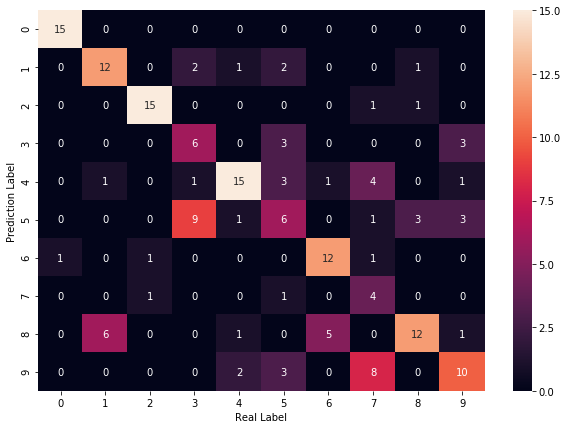

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:2 index:[5] real:5
#1 min_error:2 index:[2 7] real:2
#2 min_error:2 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1] real:1
#5 min_error:2 index:[9] real:7
#6 min_error:1 index:[6] real:6
#7 min_error:2 index:[3 5] real:3
#8 min_error:2 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:2 index:[9] real:7
#11 min_error:1 index:[5] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:3 index:[3 5] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:3 index:[3 5] real:3
#16 min_error:2 index:[5] real:9
#17 min_error:1 index:[1] real:1
#18 min_error:2 index:[2] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:2 index:[1 8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:2 index:[3 5] real:3
#23 min_error:2 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:1 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:2 index:[3 5] real:3
#28 min_error:0 index:[8] real:6
#29 min_error:3 index:[3 5] real:9
#30 

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6988249845392702
Avg Base Learner:0.8339517625231911


In [16]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.15
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.3888888888888889
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.55
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6111111111111112


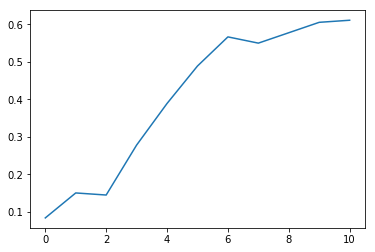

In [17]:
plt.plot(range(11),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:311 Total connections::592
